In [351]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [352]:

TARGET_WINRATE = [0.1]
ROOT_PATH = '\\\\CILab_NAS_Data/homes/inchang/MMORPG/PCGRL'

dfs = []

for win_rate in TARGET_WINRATE:
    # file_path = f"{ROOT_PATH}/pcg_winRate-{win_rate}-1.0/SkillLog_pcg_winRate-{win_rate}-1.0.csv"
    file_path = f"SkillLog_pcg_winRate-{win_rate}-1.0.csv"

    df = pd.read_csv(file_path)
    df.loc[:, 'Target_WinRate'] = win_rate

    dfs.append(df)

df = pd.concat(dfs)
df['Error_WinRate'] = df.apply(lambda x: abs(x['Result[0]'] - x['Target_WinRate']), axis=1)

instanceUuids = df['InstanceUUID'][0]
df = df[df['InstanceUUID'] == instanceUuids]



19


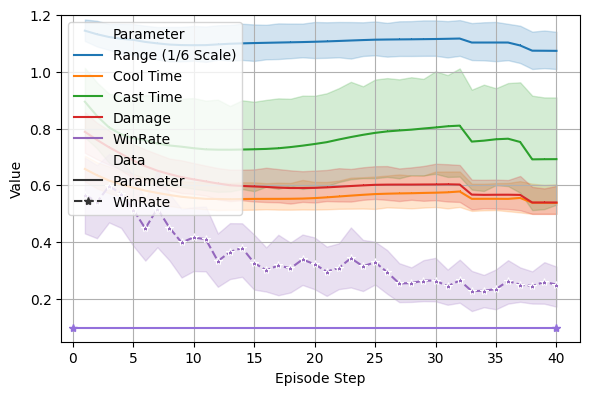

In [367]:

# episode_nums =  df.groupby('EpisodeCount').last()
sorted_df = df.sort_values(by=['Error_WinRate'])
df2 = sorted_df[(sorted_df['StepCount'] > 30) & (sorted_df['Error_WinRate'] < 0.2)]
#df2 = sorted_df.copy()
episode_nums = list(set(df2['EpisodeCount'].to_list()))
print(len(episode_nums))

new_df = df.copy()
new_df = new_df[new_df['EpisodeCount'].isin(episode_nums)]
new_df

new_df = new_df[["StepCount", "Target_WinRate",
        "Content[7]", "Content[8]", "Content[9]", "Content[15]", "Result[0]"]]
new_df.rename(columns = {"Content[7]": "Range", "Content[8]": "Cool Time", "Content[9]": "Cast Time", "Content[15]": "Damage", "Result[0]": "WinRate"}, inplace = True)

new_df['Range'] = new_df['Range'] / 6
new_df = new_df.rename(columns = {"Range": "Range (1/6 Scale)"})

new_df = pd.melt(new_df, id_vars=['StepCount', 'Target_WinRate'],
                             var_name='Parameter', value_name='Value')
new_df['Data'] = 'Parameter'
new_df.loc[new_df['Parameter'].isin(['WinRate']), 'Data'] = 'WinRate'


import matplotlib.lines as mlines

plt.figure(figsize=(6, 4))
ax = sns.lineplot(data=new_df, x="StepCount", y="Value", hue="Parameter", style="Data", markers=[',', '*'])
plt.grid()
plt.tight_layout()

l = mlines.Line2D([0, 40], [0.1, 0.1], marker='*', color='mediumpurple')
ax.add_line(l)
ax.legend(loc='upper left')
ax.set_ylim([0.05, 1.2])
ax.set(xlabel='Episode Step', ylabel='Value')
plt.savefig('ParameterChanges.pdf', dpi=300)